# Team intelligence 
Mouafek Ayadi Khouala Jouini Nasr Ladib Amal Omri Bechir Guerfili

### Data import and verification

In [24]:
import pandas as pd
dt = pd.read_excel("C:/Users\MK/Python/Classification/accouchement-prématuré-données.xls",sheet_name=0,header=0)
dt.head()

,GEST,DILATE,EFFACE,CONSIS,CONTR,MEMBRAN,AGE,STRAT,GRAVID,PARIT,DIAB,TRANSF,GEMEL,PREMATURE
0,31,3,100,3,1,2,26,3,1,0,2,2,1,positif
1,28,8,0,3,1,2,25,3,1,0,2,1,2,positif
2,31,3,100,3,2,2,28,3,2,0,2,1,1,positif
3,27,2,75,3,2,2,27,2,2,1,2,1,2,positif
4,28,6,75,3,2,2,17,3,1,0,2,1,1,positif


### Take samples from dt

In [25]:
x = dt.iloc[:,0:13].values                  
y = pd.factorize(dt['PREMATURE'])[0] 

### Train and Test data

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0) 

### DTC, RFC, KNN, SVM: who is the best classifier?

### Prediction

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()  
rfc_model = rfc.fit(X_train, y_train)  
y_pred_rfc = rfc_model.predict(X_test)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train) 
y_pred_knn = knn_model.predict(X_test)

from sklearn.svm import SVC
svm = SVC(gamma='scale', probability=True,  kernel='poly') 
svm_model = svm.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

C:\Users\MK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Accuracy

In [28]:
print('Accuracy of SVM classifier on traning set: {:.2f}'.format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm.score(X_test, y_test)))

print('Accuracy of KNN classifier on traning set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

from sklearn import metrics
import numpy as np
print('DTC')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_dtc))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_dtc))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dtc)))  
print('RFC')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rfc))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rfc))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfc)))

Accuracy of SVM classifier on traning set: 0.79
Accuracy of SVM classifier on test set: 0.70
Accuracy of KNN classifier on traning set: 0.76
Accuracy of KNN classifier on test set: 0.69
DTC
Mean Absolute Error: 0.336734693877551
Mean Squared Error: 0.336734693877551
Root Mean Squared Error: 0.5802884574739972
RFC
Mean Absolute Error: 0.2653061224489796
Mean Squared Error: 0.2653061224489796
Root Mean Squared Error: 0.5150787536377128


### Classification report

In [29]:
from sklearn.metrics import confusion_matrix,classification_report
print('DTC')
print( classification_report(y_test, y_pred_dtc))
print('RFC')
print( classification_report(y_test, y_pred_rfc)) 
print('KNN')
print( classification_report(y_test, y_pred_knn))
print('SVM')
print( classification_report(y_test, y_pred_svm)) 

DTC
              precision    recall  f1-score   support

           0       0.74      0.77      0.75        65
           1       0.50      0.45      0.48        33

   micro avg       0.66      0.66      0.66        98
   macro avg       0.62      0.61      0.61        98
weighted avg       0.66      0.66      0.66        98

RFC
              precision    recall  f1-score   support

           0       0.76      0.88      0.81        65
           1       0.65      0.45      0.54        33

   micro avg       0.73      0.73      0.73        98
   macro avg       0.71      0.67      0.68        98
weighted avg       0.72      0.73      0.72        98

KNN
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        65
           1       0.57      0.36      0.44        33

   micro avg       0.69      0.69      0.69        98
   macro avg       0.65      0.61      0.62        98
weighted avg       0.67      0.69      0.67        98

SVM
   

### ROC curve for all classifiers

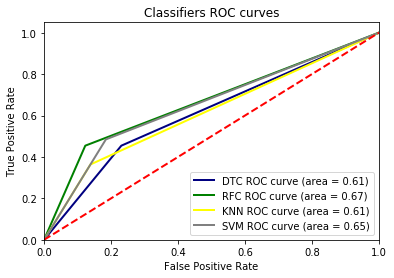

In [30]:
    import matplotlib.pyplot as plt
    %matplotlib inline 
    
    fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_dtc)
    roc_auc1 = auc(fpr1, tpr1)
    
    fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_rfc)
    roc_auc2 = auc(fpr2, tpr2)
    
    fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred_knn)
    roc_auc3 = auc(fpr3, tpr3)
    
    fpr4, tpr4, threshold4 = roc_curve(y_test, y_pred_svm)
    roc_auc4 = auc(fpr4, tpr4)
    
    plt.figure()
    plt.plot(fpr1, tpr1, color='navy', lw=2, label='DTC ROC curve (area = %0.2f)' % roc_auc1)
    plt.plot(fpr2, tpr2, color='green', lw=2, label='RFC ROC curve (area = %0.2f)' % roc_auc2)
    plt.plot(fpr3, tpr3, color='yellow', lw=2, label='KNN ROC curve (area = %0.2f)' % roc_auc3)
    plt.plot(fpr4, tpr4, color='grey', lw=2, label='SVM ROC curve (area = %0.2f)' % roc_auc4)
    
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Classifiers ROC curves')
    plt.legend(loc = "lower right")
    plt.show()

### Conclusion

For standard configuration of the following classifiers: DTC, RFC, KNN, and choosing poly as a kernal type for SVM we got the previous results, thus the best classifier is SVM, because the upper left corner is higher than the others.

Yet these results will be diffrent if we change the train and test data scalers.
Moreover changing these classifiers parameters will change these results, and depending on the dataset nature, we can choose more specific classifiers, with more adequat results.

ROC curve is a good way to choose the adequat classifier, but there are other methods that get indepth knowedge of these classifiers.